In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

previsores = []
preco_real1 = []
preco_real2 = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real1.append(base_treinamento_normalizada[i, 0])
    preco_real2.append(base_valor_maximo_normalizada[i, 0])
previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

preco_real = np.column_stack((preco_real1, preco_real2))

regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 2, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values

base_teste = pd.read_csv('petr4_teste.csv')
preco_real_open = base_teste.iloc[:, 1:2].values
preco_real_high = base_teste.iloc[:, 2:3].values

base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

   



C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

Epoch 1/100
36/36 [==============================] - 8s 222ms/step - loss: 0.0347 - mean_absolute_error: 0.1388
Epoch 2/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0168 - mean_absolute_error: 0.1004
Epoch 3/100
36/36 [==============================] - 7s 205ms/step - loss: 0.0143 - mean_absolute_error: 0.0918
Epoch 4/100
36/36 [==============================] - 7s 198ms/step - loss: 0.0120 - mean_absolute_error: 0.0843 0s - loss: 0.0121 - mean_absolute_error: 0.08
Epoch 5/100
36/36 [==============================] - 8s 212ms/step - loss: 0.0104 - mean_absolute_error: 0.0774
Epoch 6/100
36/36 [==============================] - 7s 203ms/step - loss: 0.0102 - mean_absolute_error: 0.0777
Epoch 7/100
36/36 [==============================] - 7s 196ms/step - loss: 0.0078 - mean_absolute_error: 0.0678 4s - loss: 0.0080 -
Epoch 8/100
36/36 [==============================] - 7s 205ms/step - loss: 0.0090 - mean_absolute_error: 0.0714 4s - loss: 0.0
Epoch 9/100
36/36 [====

36/36 [==============================] - 5s 148ms/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 71/100
36/36 [==============================] - 5s 148ms/step - loss: 0.0019 - mean_absolute_error: 0.0323
Epoch 72/100
36/36 [==============================] - 5s 144ms/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 73/100
36/36 [==============================] - 5s 147ms/step - loss: 0.0017 - mean_absolute_error: 0.0313
Epoch 74/100
36/36 [==============================] - 5s 147ms/step - loss: 0.0017 - mean_absolute_error: 0.0312
Epoch 75/100
36/36 [==============================] - 5s 142ms/step - loss: 0.0017 - mean_absolute_error: 0.0311
Epoch 76/100
36/36 [==============================] - 5s 142ms/step - loss: 0.0018 - mean_absolute_error: 0.0321
Epoch 77/100
36/36 [==============================] - 5s 143ms/step - loss: 0.0018 - mean_absolute_error: 0.0314
Epoch 78/100
36/36 [==============================] - 5s 129ms/step - loss: 0.0018 - mean_absolute_error: 0.0

<Figure size 640x480 with 1 Axes>

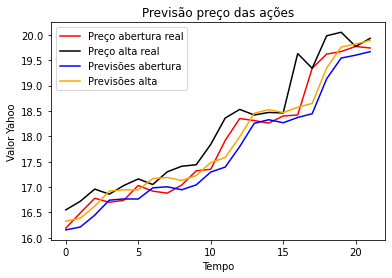

In [2]:
plt.plot(preco_real_open, color = 'red', label = 'Preço abertura real')
plt.plot(preco_real_high, color = 'black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões alta')

plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()